<a href="https://colab.research.google.com/github/Husain-Vora/Deep-Learning-and-AI/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-05-29 14:35:32--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-05-29 14:35:33 (41.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
X = data[:,0].reshape(-1, 1) # making an array of N x D
Y = data[:,1]

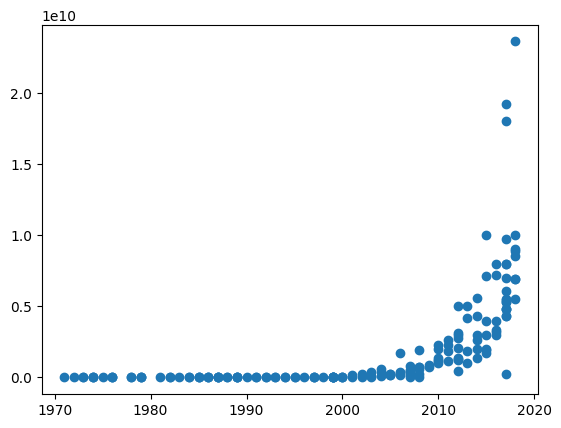

In [ ]:
plt.scatter(X, Y);

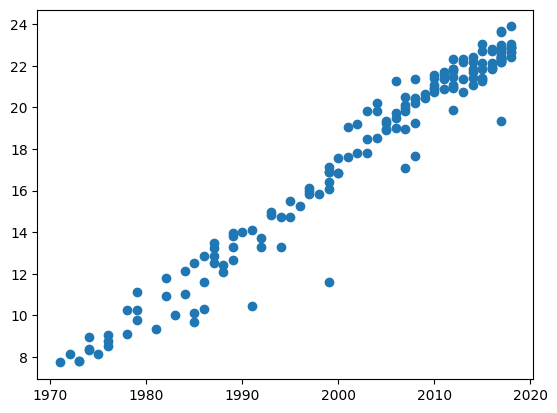

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y);

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9),
    loss = 'mse',
)

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, Y, epochs=250, callbacks=[scheduler]);

Epoch 1/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 540.3418 - learning_rate: 0.0010
Epoch 2/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 411.6409 - learning_rate: 0.0010
Epoch 3/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 412.9952 - learning_rate: 0.0010
Epoch 4/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 303.8796 - learning_rate: 0.0010
Epoch 5/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 156.9273 - learning_rate: 0.0010
Epoch 6/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.8854 - learning_rate: 0.0010
Epoch 7/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.2679 - learning_rate: 0.0010
Epoch 8/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.4419 - learning_rate: 0.0010
Epoch 9/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.6861 - learning_rate: 0.0010
Epoch 10/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.9122 - learning_rate: 0.0010
Epoch 11/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.6926 - learning_rate: 0.0010
Epoch 12/250


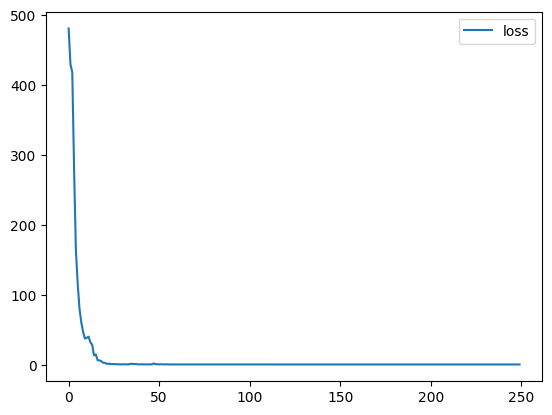

In [ ]:
#plot loss
plt.plot(r.history['loss'], label='loss');
plt.legend();

In [ ]:
model.layers

[<Dense name=dense, built=True>]

In [ ]:
model.layers[0].get_weights()

[array([[0.33501023]], dtype=float32), array([17.763157], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
a

np.float32(0.33501023)



### **Exponential Growth Model**

We model exponential growth of transistor count using the equation:

$$
C = A_0 \cdot r^t
$$

Where:

* $C$ is the transistor count at time $t$,
* $A_0$ is the initial transistor count (at $t = 0$),
* $r$ is the growth rate,
* $t$ is time (typically in years).

---

### **Linearizing the Model**

Taking the logarithm of both sides:

$$
\log C = \log (A_0 \cdot r^t)
$$

Using log properties:

$$
\log C = \log A_0 + t \cdot \log r
$$

This is in the form of a linear equation:

$$
\hat{y} = a x + b
$$

Where:

* $\hat{y} = \log C$,
* $a = \log r$,
* $x = t$,
* $b = \log A_0$.

---

### **Given Regression Slope**

From regression analysis, we are given:

$$
a = 0.34188038
$$

Thus:

$$
r = e^a = e^{0.34188038} \approx 1.4076
$$

This means that each year, the transistor count increases by a factor of **1.4076**.

---

### **Doubling Time**

We want to compute the time it takes for the transistor count to **double** — that is, for $C$ to become $2C$.

Let:

* Starting time be $t$, with transistor count $C$,
* End time be $t'$, with transistor count $2C$.

Using our model:

$$
C = A_0 \cdot r^t
$$

$$
2C = A_0 \cdot r^{t'}
$$

Dividing the second equation by the first:

$$
\frac{2C}{C} = \frac{A_0 \cdot r^{t'}}{A_0 \cdot r^t}
\Rightarrow 2 = r^{t' - t}
$$

Taking log on both sides:

$$
\log 2 = (t' - t) \cdot \log r
$$

Solving for $t' - t$:

$$
t' - t = \frac{\log 2}{\log r}
$$

Since $\log r = a$, we can simplify:

$$
\text{Doubling Time} = \frac{\log 2}{a}
$$

---

### **Conclusion**

The time it takes for the transistor count to double is:

$$
\boxed{t' - t = \frac{\log 2}{a}}
$$

With $a = 0.34188038$, we get:

$$
t' - t = \frac{\log 2}{0.34188038} \approx \frac{0.6931}{0.34188038} \approx 2.027
$$

So the transistor count **doubles approximately every 2.03 years** — which aligns with **Moore's Law**.




In [ ]:
print(f'Time to double : {np.log(2) / a}')

Time to double : 2.0690328753248046


In [ ]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)

0.341682487387313 17.764939393631764


In [ ]:
print(f'Time to double : {np.log(2) / a}')

Time to double : 2.0286295205239204


# ***Vandermonde Matrix***

In [ ]:
x = np.array([1,2,3,4])
V = np.vander(x, N=5, increasing=True)
print(V)

[[  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


# **Part 2 : Making Predictions**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


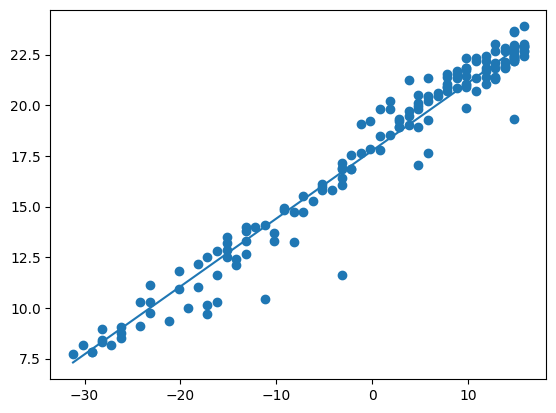

In [ ]:
#make sure line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y);
plt.plot(X, Yhat);

In [ ]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True